In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tqdm import tqdm
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, train_test_split

ROOT_DIR = os.path.abspath("./")
IMAGE_DIR = os.path.join(ROOT_DIR, "MIT-CBCL-facerec-database/training-originals")
      
def assign_label(img):
    label = float(img[3])
    return label

In [13]:
X=[]
y=[]
FAC = 1 #rescale factor
IMG_SIZE_X = 115//FAC
IMG_SIZE_Y = 115//FAC
ext = [".jpg"]

for img in tqdm(os.listdir(IMAGE_DIR)):
    if img.endswith(tuple(ext)):
        #test = img # <--------------------------------
        label = assign_label(img)
        path = os.path.join(IMAGE_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE_X,IMG_SIZE_Y))
        img=(img.flatten())
                
        X.append(np.array(img))
        y.append(label)
        
print('\ntotal number of images found: %d' % len(X))
print('\ntotal number of image classes found: %d' % len(list(set(y))))
try:
    test
except NameError:
    print("\nUncomment test line")
else:
    print(test,label)


total number of images found: 89

total number of image classes found: 10

Uncomment test line


In [14]:
X=np.array(X)

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, verbose = 3, n_jobs = 4)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:    1.7s finished
/home/reaper/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [17]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

Text(0.5, 1, 'Confusion Matrix')

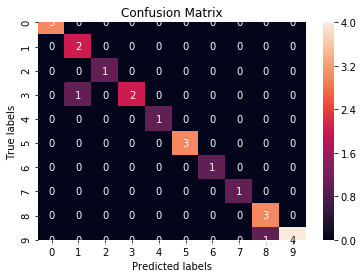

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)
import seaborn as sn
df_cm = pd.DataFrame(cm, range(len(cm)), range(len(cm)))
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [19]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       0.67      1.00      0.80         2
         2.0       1.00      1.00 

In [20]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}
